# Intorduction to API - Keras


## Background

Intorduction to API - Keras

http://localhost:8888/notebooks/scaleddeepleader/Deep%20Learning/Presentation/Keras.ipynb#Concepts



## Frameworks


<table>
    <tr>
        <th>From the scratch</th>
        <th>Low level libraries</th>
        <th>API</th>
        <th>Models</th>
    </tr>
    <tr>
        <td>
            Write all the steps using your preferred programming language. 
            1. Complex
            2. Scale for large dataset
            3. Effeciecy on data handling and calculation during multiple layers
            4. Debugging
            https://github.com/Dev-Gaju/NNFS-book-with-Implementation/blob/master/README.md
        </td>
        <td>
            Low-level libraries or framework come to rescue. Tensorflow (Google), PyTorch(Meta), JAX
            Solved for scalbility, effeciency
            Reduce the complexity, but the learning curve is bit high and debugging is hard
        </td>
        <td>
            API runs on top of Low level libraries.
            Keras is one of the popular API, which we will use in demo
        </td>
        <td>
            Pre trained Models
        </td>        
    </tr>
    
    
</table>

## Handwriting recognition

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9. Our challenge - to predict which number each handwritten image represents.


## CNN Version

In [1]:
import keras

In [2]:
print(keras.backend.backend_config)

<module 'keras.backend_config' from '/Users/jegankarunakaran/anaconda3/lib/python3.11/site-packages/keras/backend_config.py'>


### Step1: Data Preparation

In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

#### Step 1a: Reshape and Batch

In [5]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

#### Step 1.b: Cleanups and numeric conversion

In [6]:
# Convert to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#### Step 1c: Normalize

In [7]:
train_images /= 255
test_images /= 255

In [8]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

### Step2: Build the Model

#### Step2.a: Create model layers

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

#### Step2.b: Compile model with function names

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Step3: Train the Model

In [10]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=5,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-02-18 09:13:48.242011: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 - 19s - loss: 0.1885 - accuracy: 0.9429 - val_loss: 0.0419 - val_accuracy: 0.9864 - 19s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 22s - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0348 - val_accuracy: 0.9880 - 22s/epoch - 11ms/step
Epoch 3/5
1875/1875 - 23s - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0343 - val_accuracy: 0.9892 - 23s/epoch - 12ms/step
Epoch 4/5
1875/1875 - 24s - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0273 - val_accuracy: 0.9917 - 24s/epoch - 13ms/step
Epoch 5/5
1875/1875 - 24s - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0291 - val_accuracy: 0.9909 - 24s/epoch - 13ms/step


In [11]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02908139117062092
Test accuracy: 0.9908999800682068


In [12]:
predict_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
predict_images = predict_images.astype('float32')
predict_images /= 255

In [17]:
#predict_images[0].reshape(1, 28, 28, 1)

In [15]:
model.predict(predict_images)

313/313 [==============================] - 1s 4ms/step


array([[1.4247474e-11, 9.1893826e-10, 4.9198999e-08, ..., 1.0000000e+00,
        8.0648227e-10, 4.1214623e-08],
       [3.1013414e-10, 1.0339910e-08, 1.0000000e+00, ..., 6.3295779e-12,
        3.4633910e-12, 4.5861320e-15],
       [6.0429217e-10, 9.9999213e-01, 3.2943419e-07, ..., 2.0529328e-06,
        2.9097623e-07, 1.6709256e-08],
       ...,
       [1.3551612e-15, 4.8017763e-09, 2.3457066e-11, ..., 6.6145206e-10,
        7.8076404e-08, 1.1556642e-07],
       [2.2978279e-11, 3.7028994e-11, 1.8554842e-13, ..., 4.1487417e-12,
        3.4232252e-07, 5.3197060e-09],
       [2.2362179e-09, 9.4638576e-12, 1.7797168e-11, ..., 1.0415579e-16,
        9.0785353e-09, 1.0653593e-12]], dtype=float32)

1/1 [==============================] - 0s 6ms/step


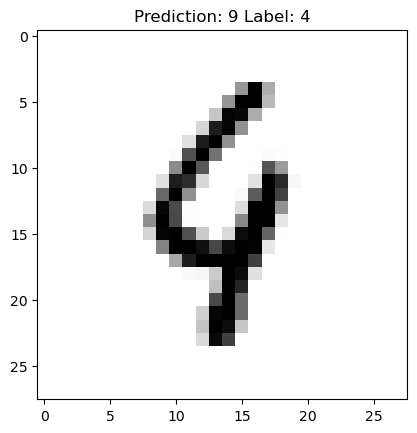

1/1 [==============================] - 0s 7ms/step


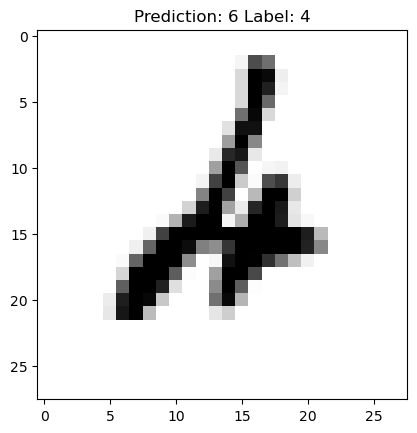

1/1 [==============================] - 0s 7ms/step


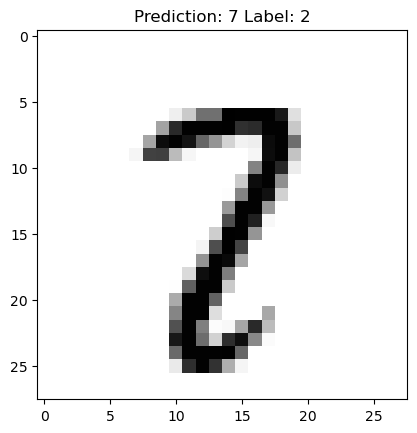

1/1 [==============================] - 0s 6ms/step


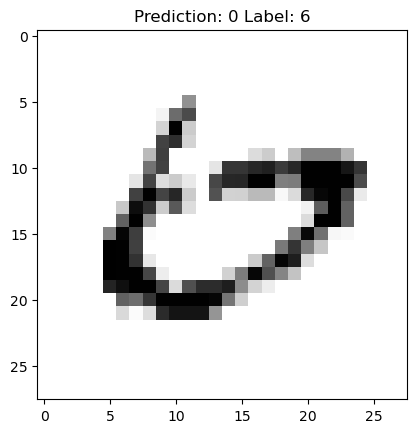

1/1 [==============================] - 0s 6ms/step


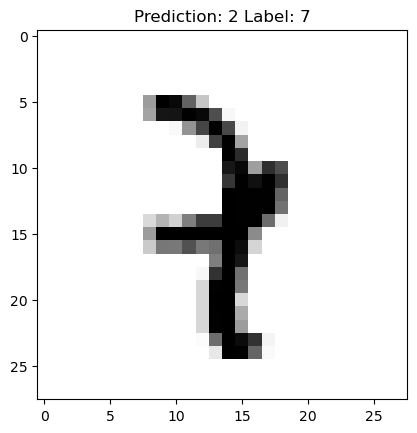

1/1 [==============================] - 0s 6ms/step


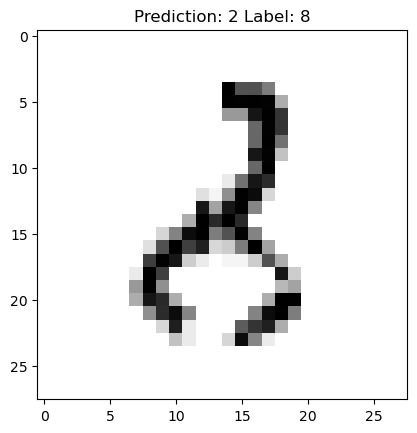

1/1 [==============================] - 0s 6ms/step


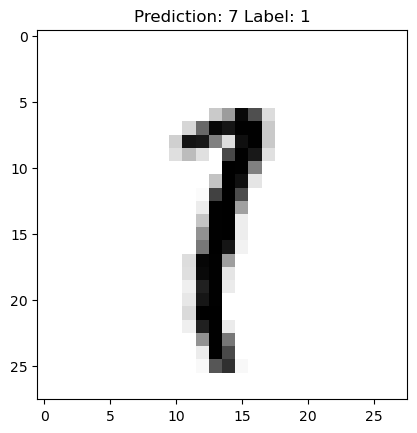

1/1 [==============================] - 0s 7ms/step


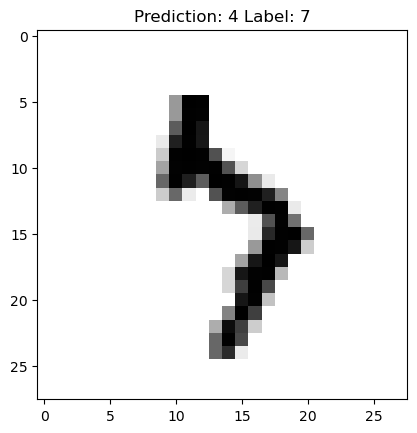

1/1 [==============================] - 0s 6ms/step


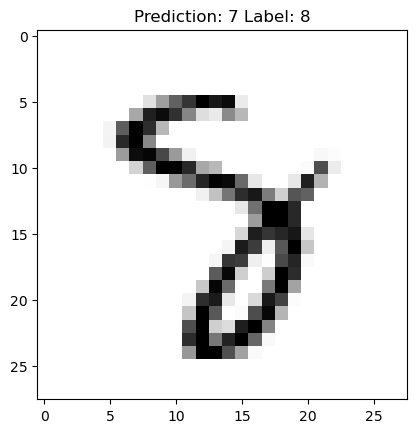

1/1 [==============================] - 0s 6ms/step


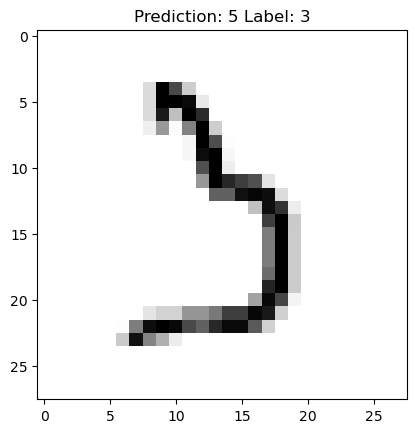

1/1 [==============================] - 0s 5ms/step


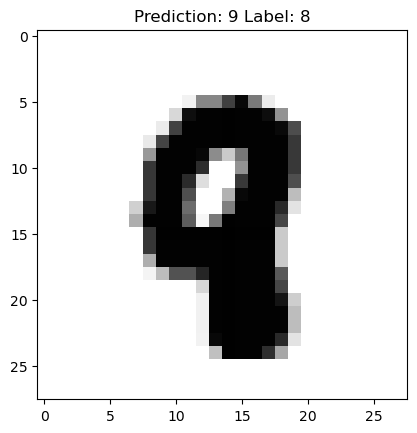

1/1 [==============================] - 0s 6ms/step


In [19]:
for x in range(1000):
    pred_img = predict_images[x].reshape(1, 28, 28, 1)
    #test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(pred_img).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(pred_img.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()